# LOGISTIC REGRESSION

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

## A. LOAD DATA

In [87]:
!gdown "1xvDMytdGjYNR6leeQjg7V7pNxr-QUBUn"

Downloading...
From: https://drive.google.com/uc?id=1xvDMytdGjYNR6leeQjg7V7pNxr-QUBUn
To: /content/heart.csv
100% 38.1k/38.1k [00:00<00:00, 3.23MB/s]


In [88]:
data = pd.read_csv("heart.csv")

In [89]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


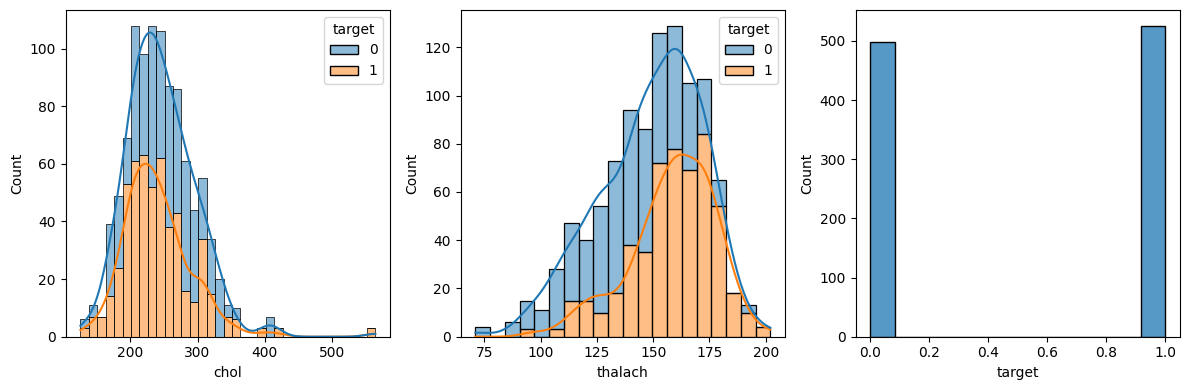

In [90]:
#@title Plot something for fun 🙂
f, axes = plt.subplots(1, 3, figsize=(12, 4))
sns.histplot(data=data, x='chol', hue='target', multiple='stack', ax=axes[0], kde=True)
sns.histplot(data=data, x='thalach', hue='target', multiple='stack', ax=axes[1], kde=True)
sns.histplot(data=data, x='target', ax=axes[2])
f.tight_layout()

In [91]:
data.target.value_counts()

1    526
0    499
Name: target, dtype: int64

## B. TRAIN TEST SPLIT

In [92]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [93]:
x

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [94]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [95]:
#@title Standardization (Code tay)
def Train_Standardization(X_Train):
  df = X_Train.copy(deep=False)
  scale = []
  cols = df.columns.values
  for col in cols:
    mean = df[col].mean()
    std = df[col].std()
    df[col] = (df[col] - mean)/std
    scale.append([mean, std])
  return df, scale

def Test_Standardization(X_test, scale_X):
  X = X_test.copy(deep=False)
  cols = X.columns
  i = 0
  for col in cols:
    X[col] = (X[col] - scale_X[i][0])/scale_X[i][1]
    i += 1
  return X

In [96]:
#@title Standardization (StandardScaler())
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [97]:
X_train

array([[-0.58584022,  0.65465367,  1.008275  , ...,  1.00526437,
         2.17169136, -0.54519316],
       [ 1.05147737, -1.52752523, -0.91672034, ...,  1.00526437,
        -0.7254674 , -0.54519316],
       [-0.04006769, -1.52752523,  1.008275  , ...,  1.00526437,
        -0.7254674 , -0.54519316],
       ...,
       [-0.36753121,  0.65465367, -0.91672034, ...,  1.00526437,
        -0.7254674 ,  1.11057867],
       [-1.24076726,  0.65465367, -0.91672034, ...,  1.00526437,
        -0.7254674 ,  1.11057867],
       [-0.2583767 ,  0.65465367, -0.91672034, ...,  1.00526437,
         0.24025219, -0.54519316]])

In [98]:
X_train = np.hstack((np.ones((X_train.shape[0],1)),X_train))
X_test = np.hstack((np.ones((X_test.shape[0],1)),X_test))

In [99]:
X_train

array([[ 1.        , -0.58584022,  0.65465367, ...,  1.00526437,
         2.17169136, -0.54519316],
       [ 1.        ,  1.05147737, -1.52752523, ...,  1.00526437,
        -0.7254674 , -0.54519316],
       [ 1.        , -0.04006769, -1.52752523, ...,  1.00526437,
        -0.7254674 , -0.54519316],
       ...,
       [ 1.        , -0.36753121,  0.65465367, ...,  1.00526437,
        -0.7254674 ,  1.11057867],
       [ 1.        , -1.24076726,  0.65465367, ...,  1.00526437,
        -0.7254674 ,  1.11057867],
       [ 1.        , -0.2583767 ,  0.65465367, ...,  1.00526437,
         0.24025219, -0.54519316]])

In [100]:
X_test

array([[ 1.        ,  0.83316836, -1.52752523, ...,  1.00526437,
        -0.7254674 , -0.54519316],
       [ 1.        , -0.1492222 , -1.52752523, ...,  1.00526437,
        -0.7254674 , -3.85673683],
       [ 1.        ,  0.06908682,  0.65465367, ..., -0.64007851,
         0.24025219,  1.11057867],
       ...,
       [ 1.        , -1.13161275,  0.65465367, ...,  1.00526437,
        -0.7254674 , -0.54519316],
       [ 1.        ,  0.72401385,  0.65465367, ...,  1.00526437,
         0.24025219,  1.11057867],
       [ 1.        ,  0.39655033,  0.65465367, ..., -0.64007851,
         0.24025219,  1.11057867]])

## C. VISUALIZE SOME LOG FUNCTIONS

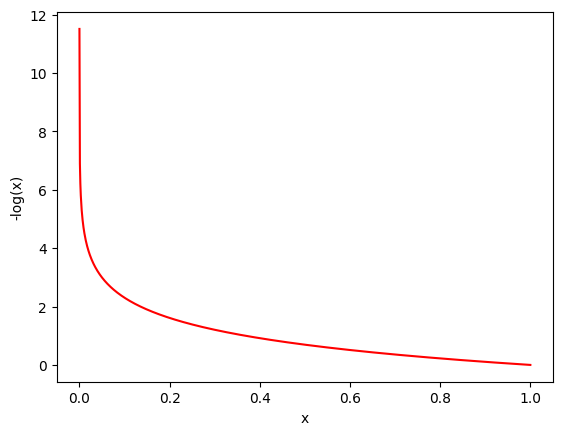

In [112]:
def f_log(x):
  return -np.log(x)

x = np.linspace(0+0.00001, 1, 1000)
plt.plot(x, f_log(x), color='red')
plt.xlabel('x')
plt.ylabel('-log(x)')
plt.show()

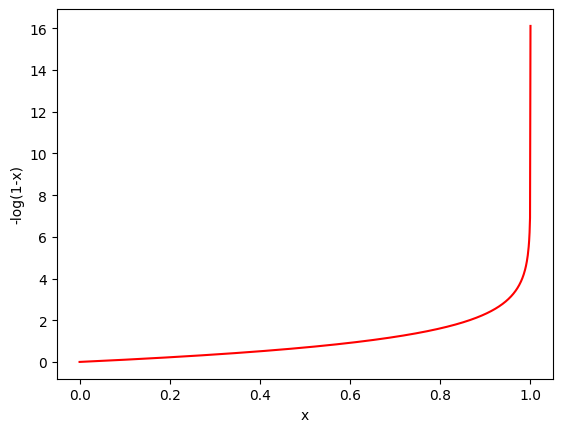

In [113]:
def f_log2(x):
  return -np.log(1-x)

x = np.linspace(0, 1-0.0000001, 1000)
plt.plot(x, f_log2(x), color='red')
plt.xlabel('x')
plt.ylabel('-log(1-x)')
plt.show()

## D. LOGISTIC REGRESSION IMPLEMENTATION

In [103]:
class LogisticRegression:
  def __init__(self, x_data, y_data, learning_rate=0.01, num_epoches=10000):
    self.x_data = x_data
    self.y_data = y_data
    self.learning_rate = learning_rate
    self.num_epoches = num_epoches
    self.w = np.random.randn(x_data.shape[1],)
    self.cost = []

  def sigmoid(self, z):
    return 1.0/(1.0 + np.exp(-z))

  def predict(self, sz):
    return np.array((sz >= 0.5).astype('int'))

  def compute_cost(self, sigmoids):
    cost_class_1 = self.y_data.T.dot(np.log(sigmoids))
    cost_class_0 = (1-self.y_data).T.dot(np.log(1-sigmoids))
    return -(cost_class_1 + cost_class_0)/len(self.y_data)

  def update_weight(self, sigmoids):
    N = len(self.x_data)
    gradient_descent_w = self.x_data.T.dot(sigmoids - self.y_data)/N
    new_weights = self.w - self.learning_rate*gradient_descent_w
    return new_weights

  def fit(self):
    for _ in range(self.num_epoches):
      z = self.x_data.dot(self.w)
      sigmoids = self.sigmoid(z)
      cost = self.compute_cost(sigmoids)
      self.cost.append(cost)
      self.w = self.update_weight(sigmoids)

    return self.w, self.cost

  def classification_report(self, x_test, y_test, class_label=1):
    z = x_test.dot(self.w)
    sz = self.sigmoid(z)
    y_pred = self.predict(sz)

    TP = np.sum((y_pred==class_label) & (y_test==class_label))
    FP = np.sum((y_pred==class_label) & (y_test!=class_label))

    reverse_label = 0 if class_label==1 else 1

    TN = np.sum((y_pred==reverse_label) & (y_test==reverse_label))
    FN = np.sum((y_pred==reverse_label) & (y_test!=reverse_label))

    accuracy = np.round((TP + TN)/len(y_test), 2)
    precision = np.round((TP)/(TP + FP), 2)
    recall = np.round((TP)/(TP + FN), 2)
    f1_score = np.round(2*(precision*recall)/(precision+recall), 2)

    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 score: ", f1_score)

### Training

In [104]:
lg = LogisticRegression(X_train, y_train)
w, cost = lg.fit()

In [105]:
w

array([-0.13216028, -0.01613821, -0.85331217,  0.90591076, -0.32254924,
       -0.45339361, -0.06462338,  0.14308909,  0.64894199, -0.42404964,
       -0.78207058,  0.35136763, -0.86316616, -0.66770275])

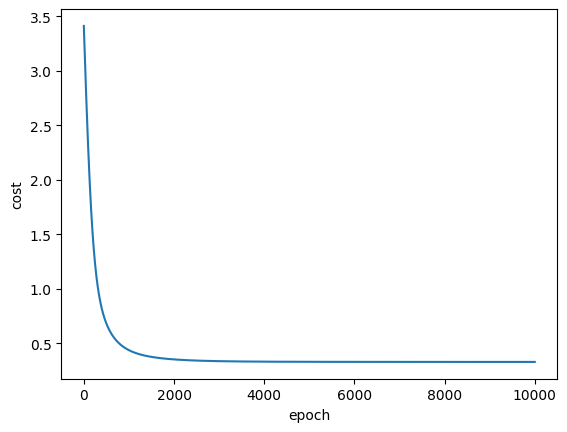

In [106]:
plt.plot(cost)
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()

## E. EVALUATION ON TRAIN, TEST SET

In [107]:
#@title Train set
print("\tFor class 0:")
lg.classification_report(X_train, y_train, 0)
print("\n\tFor class 1:")
lg.classification_report(X_train, y_train)

	For class 0:
Accuracy:  0.87
Precision:  0.9
Recall:  0.83
F1 score:  0.86

	For class 1:
Accuracy:  0.87
Precision:  0.85
Recall:  0.91
F1 score:  0.88


In [108]:
#@title Test set
print("\tFor class 0:")
lg.classification_report(X_test, y_test, 0)
print("\n\tFor class 1:")
lg.classification_report(X_test, y_test)

	For class 0:
Accuracy:  0.8
Precision:  0.85
Recall:  0.72
F1 score:  0.78

	For class 1:
Accuracy:  0.8
Precision:  0.76
Recall:  0.87
F1 score:  0.81


# TEST WITH SKLEARN

In [109]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_train, y_train)

LogisticRegression()

## EVALUATION

In [110]:
#@title Train set
y_pred_train = lgr.predict(X_train)
print("In train set: ")
print(classification_report(y_train, y_pred_train))

In train set: 
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       397
           1       0.85      0.91      0.88       423

    accuracy                           0.87       820
   macro avg       0.87      0.87      0.87       820
weighted avg       0.87      0.87      0.87       820



In [111]:
#@title Test set
y_pred_test = lgr.predict(X_test)
print("In test set: ")
print(classification_report(y_test, y_pred_test))

In test set: 
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

